In [17]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
pd.set_option('display.max_columns', 999)
import seaborn as sns
from sklearn.model_selection import train_test_split

In [26]:
dr7 = pd.read_csv('../../data/TRAIN.csv')
dr14 = pd.read_csv('../../data/dr14/TRAIN_dr14_err<.3.csv')
# data = pd.read_csv('../../data/dr14/TRAIN_dr14_err<.4.csv')
print(data['Mass'].describe())
print(dr7['Mass_ground_truth'].describe())

count    19552.000000
mean         8.671801
std          0.505064
min          5.841327
25%          8.350089
50%          8.686667
75%          9.009936
max         10.603082
Name: Mass, dtype: float64
count    7662.000000
mean        8.872079
std         0.486443
min         6.996912
25%         8.557367
50%         8.894405
75%         9.209830
max        10.780877
Name: Mass_ground_truth, dtype: float64


In [22]:
print(data.columns)

Index(['my_ID', 'ID', 'MJD', 'ra', 'dec', 'Mass', 'z', 'ERR', 'M_i',
       'spec_mjd', 'ra.1', 'dec.1', 'u_band', 'g_band', 'r_band', 'i_band',
       'z_band', 'ug', 'gr', 'ri', 'iz', 'zu'],
      dtype='object')


(6.0, 11.0)

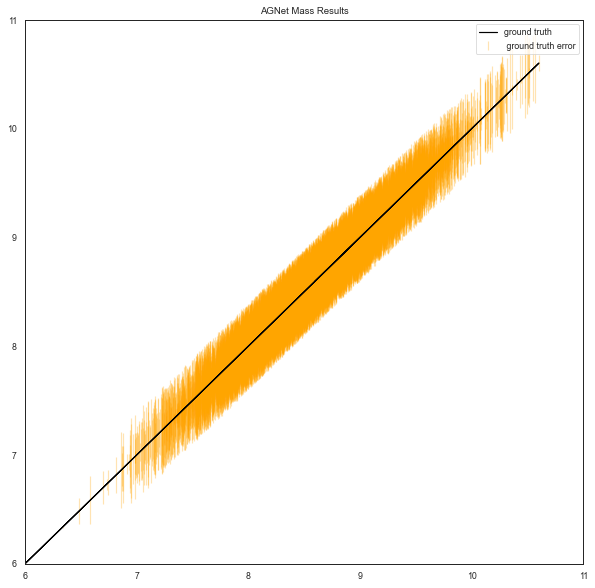

In [27]:
plt.figure(figsize=[10,10])
# plt.scatter(matched['ground_truth'], matched['network_predictions'], s=2, color='blue',zorder=2, label = 'predictions')
plt.plot(data['Mass'], data['Mass'],color='black',zorder=1, label = 'ground truth')
plt.errorbar(data['Mass'], data['Mass'], yerr=data['ERR'], alpha=.3,zorder=0,ecolor='orange',ls='', label = ' ground truth error')
plt.title('AGNet Mass Results')
plt.legend()
plt.xlim(6,11)
plt.ylim(6,11)
# plt.savefig('/Users/SnehPandya/Desktop/error_plot.png',facecolor='w')

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


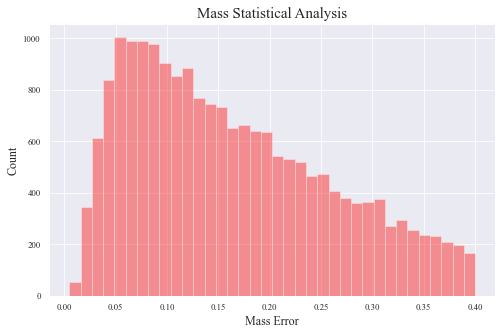

In [28]:
# Plot mass error vs count
plt.figure(figsize=(8, 5))
sns.set(font='Times New Roman')
sns.set_context('paper')
sns.distplot(data['ERR'], kde=False, color='red')
plt.title('Mass Statistical Analysis',  fontsize=15)
# plt.xlim(0,10)
plt.xlabel('Mass Error',  fontsize=12)
plt.ylabel('Count',  fontsize=12)
plt.show()

[Text(0.5, 0, 'redshift'),
 Text(0, 0.5, 'Black Hole Mass'),
 Text(0.5, 1.0, 'DR7')]

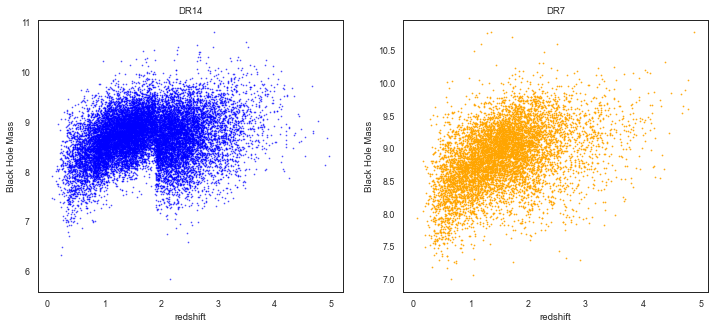

In [29]:
sns.set_style('white')
# plt.figure(figsize=(10,7))
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
# x = np.linspace(0,4,1000)
ax.scatter(dr14['z'],dr14['Mass'], s=1, alpha=.5, label = 'DR14', color='blue')
ax2.scatter(dr7['z'],dr7['Mass_ground_truth'], s=1, alpha = .8, label = 'DR7', color='orange')
ax.set(xlabel = 'redshift', ylabel = 'Black Hole Mass', title = 'DR14')
ax2.set(xlabel = 'redshift', ylabel = 'Black Hole Mass', title='DR7')

# fig, (ax1, ax2) = plt.subplots(1,2)
# fig.suptitle('DR14 & DR7 Comparison')
# ax1.scatter(dr14['z'],dr14['Mass'], s=1, alpha=.3, label = 'DR14', color='blue')
# ax2.scatter(dr7['z'],dr7['Mass_ground_truth'], s=1, alpha=.8, label = 'DR7', color='orange')


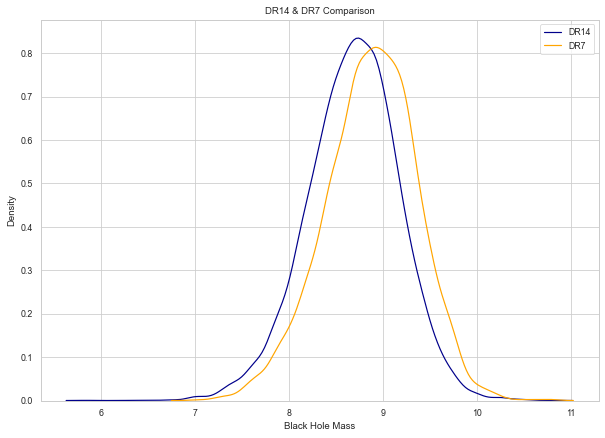

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))

sns.kdeplot(dr14['Mass'], label = 'DR14', color = 'darkblue')
sns.kdeplot(dr7['Mass_ground_truth'], label = 'DR7', color = 'orange')

plt.xlabel('Black Hole Mass')
plt.title('DR14 & DR7 Comparison')
plt.legend()

/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/SnehPandya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


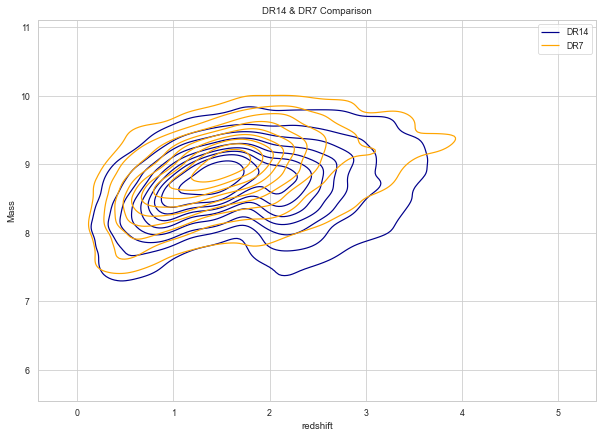

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))

sns.kdeplot(dr14['z'],dr14['Mass'], label = 'DR14', color = 'darkblue')
sns.kdeplot(dr7['z'],dr7['Mass_ground_truth'], label = 'DR7', color = 'orange')

plt.xlabel('redshift')
plt.ylabel('Mass')
plt.title('DR14 & DR7 Comparison')
plt.legend()